In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['pid', 'EventName', 'Time', 'Time_utc']
data = pd.read_csv('data/player_logged_in.csv', header=0, names=column_names)
# Get Unique Count of the first column in player logged in csv
uniquePlayersAmount = data['pid'].nunique()
print("Unique Player Amount = ", uniquePlayersAmount)


Unique Player Amount =  11080


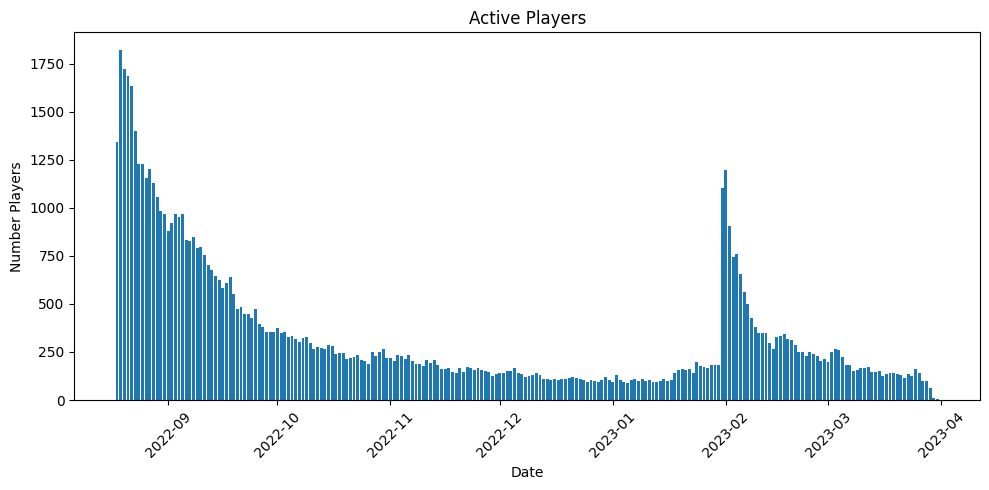

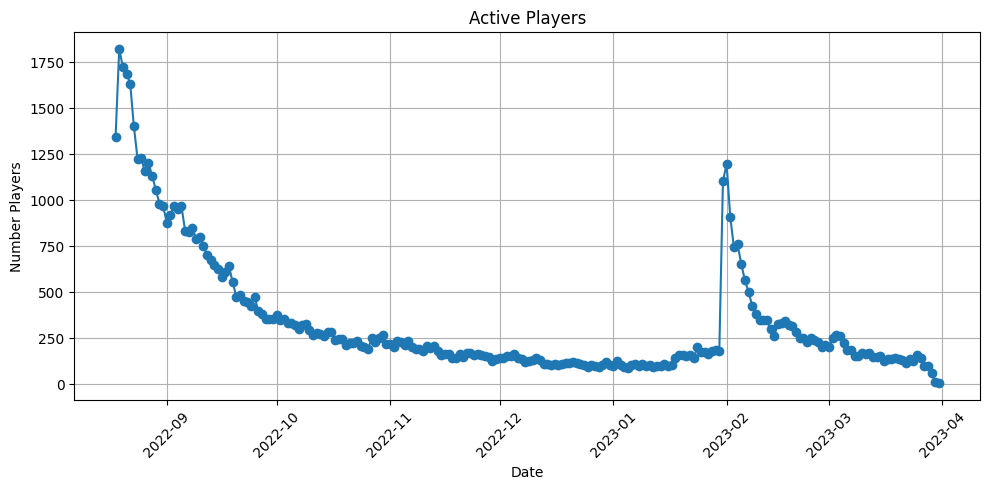

In [3]:
#Get needed data
uniquePlayersData = data[['pid', 'Time']].copy()
uniquePlayersData['Date'] = pd.to_datetime(uniquePlayersData['Time']).dt.date
#group data by unique playerID and date
dailyPlayers = uniquePlayersData.groupby('Date')['pid'].nunique().reset_index()
dailyPlayers.columns = ['Date', 'ActivePlayers']

dailyPlayers.sort_values('Date')

#Bar
plt.figure(figsize=(10, 5))
plt.bar(dailyPlayers['Date'], dailyPlayers['ActivePlayers'])
plt.title('Active Players')
plt.xlabel('Date')
plt.ylabel('Number Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Line
plt.figure(figsize=(10, 5))
plt.plot(dailyPlayers['Date'], dailyPlayers['ActivePlayers'], marker='o')
plt.title('Active Players')
plt.xlabel('Date')
plt.ylabel('Number Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()